# Cardio Disease Project:
    The dataset  presents 70,000 data separated into 12 distinct characteristics, such as age, gender, blood pressure, cholesterol, smoker or non-smoker, etc. The target class will be 'cardio', which will be described as: '0' when the patient is healthy and '1' when the patient has cardiovascular disease.

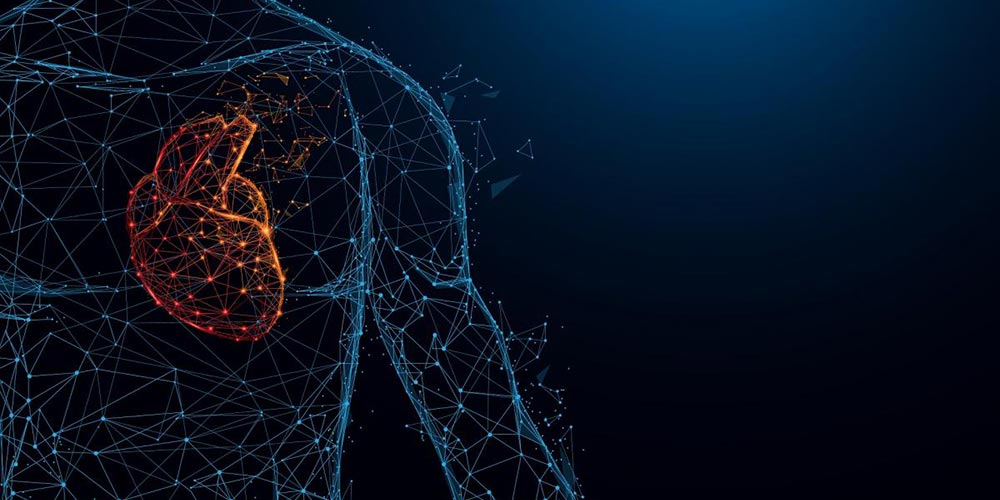

## Data Description
1. **Age** | Objective Feature | age | int (days)
2. **Height** | Objective Feature | height | int (cm) |
3. **Weight** | Objective Feature | weight | float (kg) |
4. **Gender** | Objective Feature | gender | categorical code | 1:woman 2: man
5. **Systolic blood pressure** | Examination Feature | ap_hi | int |
6. **Diastolic blood pressur**e | Examination Feature | ap_lo | int |
7. **Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. **Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. **Smoking** | Subjective Feature | smoke | binary |
10. **Alcohol intake** | Subjective Feature | alco | binary |
11.**Physical activity** | Subjective Feature | active | binary |
12. **Presence or absence of cardiovascular disease** | Target Variable | cardio | 1: disease 0: no|

## Import Libraries

In [36]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.offline as py

# Ignorar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

## Loading data

In [2]:
n = None
df = pd.read_csv('cardio_train.csv', delimiter = ';', nrows = n)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Data dimension
print("Number of rows: {}".format(df.shape[0]));
print("Number of columns: {}".format(df.shape[1]))
df.info()

Number of rows: 70000
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Setting up the data

In [4]:
# First, for better analysis we will convert the unit in 'days to 'years' from the 'age' column

df['age'] = df['age'].apply(lambda x: x/365)

df['age'] = df['age'].astype(int)

In [5]:
# Drop the ID column 
df = df.drop('id', axis = 1)

Important to analyze the **descriptive statistics** of the dataset, the following formula
returns important values from the dataset per variable, such as:
mean, standard deviation, maximum and minimum value.

In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


If we look in more detail at the table above it is possible to observe some values that could be an error or outlier that will hinder future analyses. For example:
        1. minimum height is as 55 cm
        2. minimum weight is 10kg
        3. minimum systolic and diastolic pressure are negative
        4. It is important to check if there is any data where the diastolic is higher than the systolic, which is **impossible** to occur.
        
We can say that it is an **error**, because the minimum age of the dataset is **29 years**.
Thus, it is important to treat the outliers before starting a more in-depth analysis:

In [7]:
# Detection and removal of outliers by the Interquartile Range (IQR) approach

def remove_outlier(col):
    
    Q1 = np.percentile(df[col], 25,
                  interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,
                  interpolation = 'midpoint')
    IQR = Q3 - Q1
    print('Old Shape: ', df.shape)

    upper = np.where(df[col] >= (Q3+1.5*IQR))
    lower = np.where(df[col] <= (Q1-1.5*IQR))

    # Remove outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print ('New Shape: ', df.shape)

In [8]:
remove_outlier('height')

Old Shape:  (70000, 12)
New Shape:  (69481, 12)


In [9]:
# Analyzing the variables 'ap_hi' and 'ap_lo'
print('Systolic pressure is higher than diastolic pressure in {0} cases'.format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Systolic pressure is higher than diastolic pressure in 1221 cases


In [10]:
# We will use another method to deal with outliers in systolic and diastolic pressure
# 1. diastolic and systolic pressure cannot be negative values
# 2. diastolic pressure cannot be greater than systolic pressure:

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

print("Systolic pressure is higher than diastolic pressure in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Systolic pressure is higher than diastolic pressure in 0 cases


In [11]:
display (df.describe())
display (df.shape)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(65708, 12)

In [12]:
# With the weight and height variables in hand, it will be interesting for analysis
# to create the 'BMI' column. It is known that BMI may have a strong correlation
# with cardiovascular disease. Normal BMI values range from 18.5 to 25.

df['IMC'] = df['weight']/((df['height']/100)**2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


## Exploratory Data Analysis

In [13]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725,27.406913
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951,5.119358
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110279
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


    To start the exploratory analysis it is important to check if the data for the target variable 'cardio' are balanced in the dataset, since unbalanced data can lead to problems when building models and generating predictions.


In [14]:
# Checking the distribution of the variable 'cardio' in the dataset:
# Get a count of the number of individuals with cardio

display (df['cardio'].value_counts());
display (print("\nPatients with heart disease represent {:.2f}% of the dataset.\n".format((df[df.cardio == 1].shape[0] / df.shape[0]) * 100)));


cardio
0    33332
1    32376
Name: count, dtype: int64


Patients with heart disease represent 49.27% of the dataset.



None

In [15]:
#Estilo / design para os gráficos
plt.style.use('ggplot')

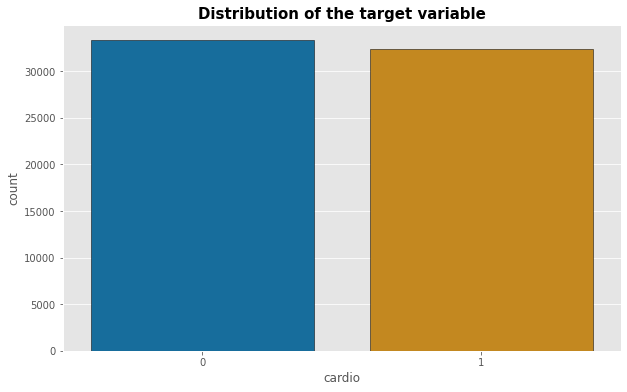

In [16]:
# visualize the amount of cardio disease in the dataset
# We can say that the target variable is balanced across the dataset

plt.figure(figsize=(10,6))
fig = sns.countplot(x='cardio', data=df, palette='colorblind', edgecolor='black')
fig.set_title('Distribution of the target variable', fontsize = 15, weight = 'bold');

 **The first analysis we will perform is the influence of age on the appearance of heart diseases. It is possible to state that the older one gets, the more likely he is to develop heart disease?**

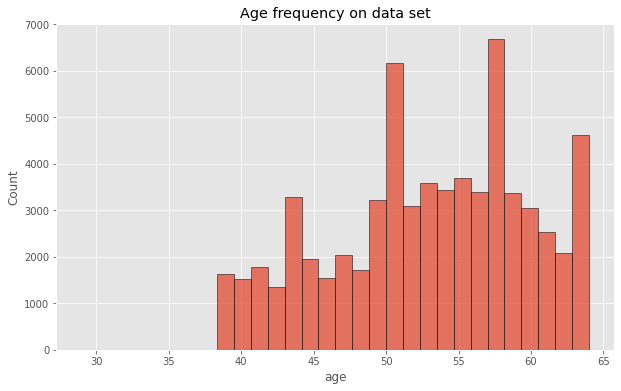

In [17]:
#Age frequency on the dataset

plt.figure(figsize=(10,6))
plt.title('Age frequency on data set')

sns.histplot(data=df, x = 'age', bins = 30, edgecolor ='black');

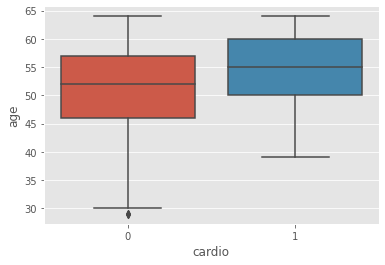

In [18]:
# categorical vs. numerical
sns.boxplot(x="cardio", y="age", data=df);

<Figure size 1440x1296 with 0 Axes>

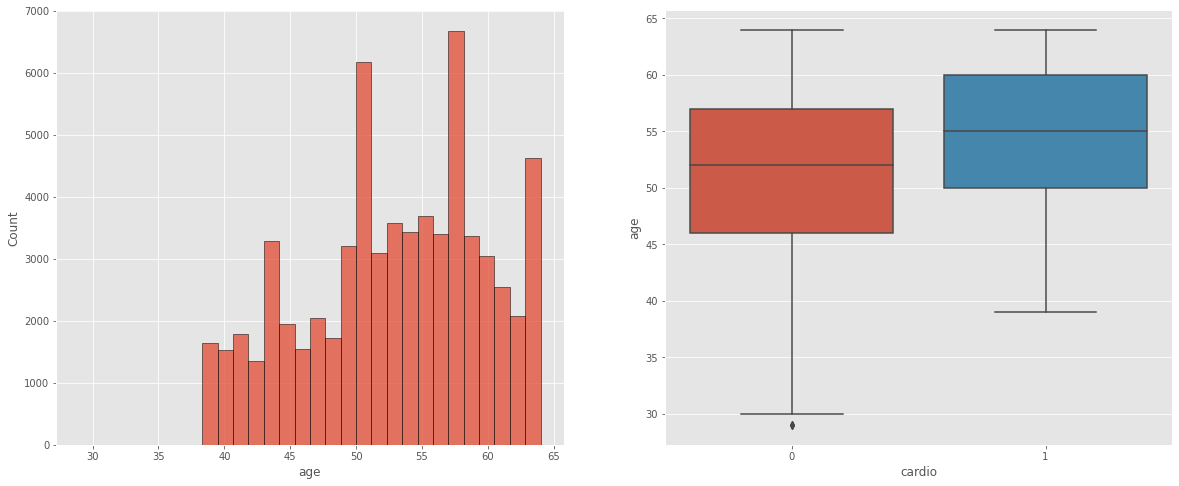

In [19]:
plt.figure (figsize = (20,18))
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20,8));
plt.tight_layout;


sns.histplot(data=df, x = 'age', bins = 30,  edgecolor ='black', ax = axes[0]);
sns.boxplot(x="cardio", y="age", data=df, ax = axes[1]);

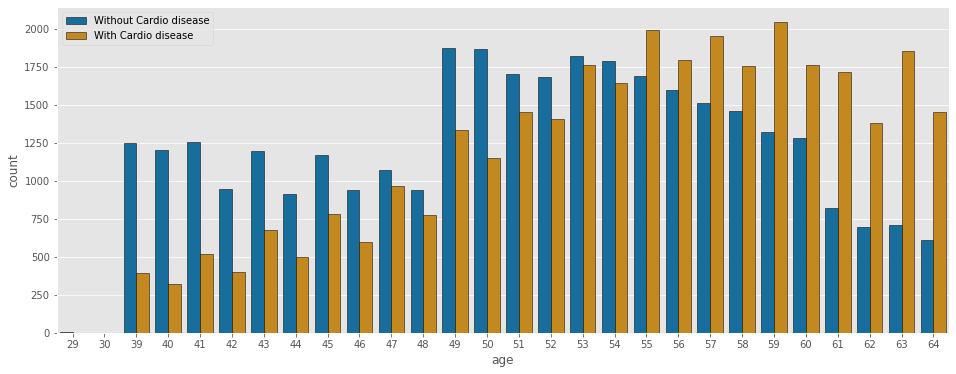

In [20]:
# Step Two: Analyze if there is a correlation between age and onset
# of heart disease:
# Age x Cardio#

# The graph below clearly demonstrates that there is a trend in the data set that after the age of 55, 
# the sample of patients with heart disease is larger than that of patients without heart disease. 

plt.figure(figsize=(16,6))
fig = sns.countplot(x='age', hue='cardio', data=df, 
                    palette='colorblind', 
                    edgecolor='black')
plt.legend(labels =['Without Cardio disease','With Cardio disease'], 
           loc='upper left');


**The second analysis to be made is: is there a correlation between gender and the presence of heart disease?**

In [21]:
#Number per gender
df['gender'].value_counts()

gender
1    42800
2    22908
Name: count, dtype: int64

In [22]:
#Percentual -> normalize = True
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.330371,0.176904
1,0.320996,0.171729


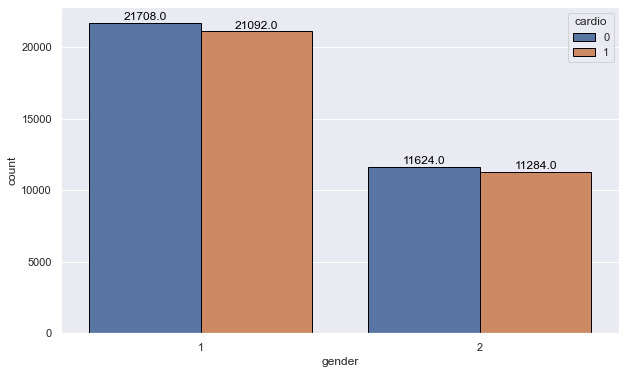

In [23]:
#Gender x Cardio - Count number by gender who have cardio disease
                # 1: man and 2: woman      
#Apparently there is no correlation between gender and presence of heart disease

plt.figure(figsize=(10,6))
sns.set(font_scale = 1)

ax = sns.countplot(x='gender', hue='cardio', data=df, 
                    palette='deep', 
                    edgecolor='black')

for i in ax.patches:
    ax.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', fontsize = 12, color = 'black',
               xytext = (0,3),
               textcoords = 'offset points')


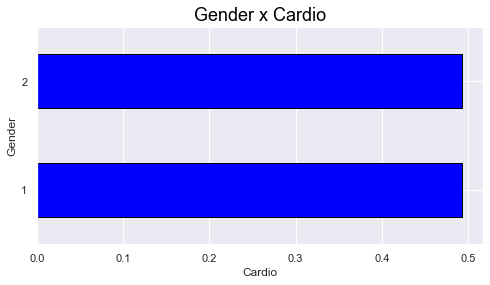

In [24]:
plt.figure(figsize=(8,4))
df.groupby('gender')['cardio'].mean().plot.barh(color = 'blue', edgecolor ='black')

plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Gender x Cardio', fontsize = 18, color = 'black');

**Let's analyze the relationship between the categorical variables and the target variable**

**1. Cholesterol:** 1: normal, 2: above normal, 3: well above normal 
    

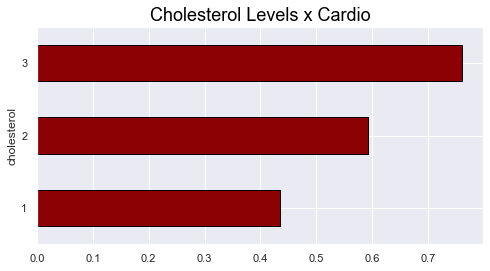

In [25]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Cholesterol Levels x Cardio', fontsize = 18, color = 'black')

df.groupby('cholesterol')['cardio'].mean().plot.barh(color='darkred',
                                               edgecolor ='black');

2. **Gluc x Cardio**
Clearly it can be seen that the higher the glucose level (1: normal, 2: above normal, 3: well above normal), the higher the sample of presence of heart disease

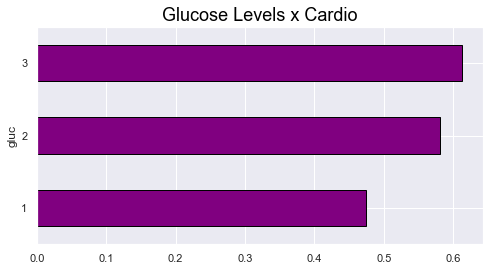

In [26]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gluc', fontsize=12)
plt.title('Glucose Levels x Cardio', fontsize = 18, color = 'black')
df.groupby('gluc')['cardio'].mean().plot.barh(color='purple',
                                               edgecolor ='black');


In [27]:
# correlation between the data
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
age,1.000000,-0.028151,-0.092352,0.050523,0.205805,0.148482,0.153196,0.097432,-0.049924,-0.029899,-0.010597,0.236886,0.100071
gender,-0.028151,1.000000,0.521904,0.149769,0.047941,0.054308,-0.039956,-0.023213,0.337275,0.169960,0.006124,-0.000214,-0.113794
height,-0.092352,0.521904,1.000000,0.301193,0.002943,0.023128,-0.060337,-0.023617,0.194875,0.096800,-0.008390,-0.019472,-0.195545
weight,0.050523,0.149769,0.301193,1.000000,0.249314,0.228882,0.137139,0.102180,0.064978,0.064838,-0.015971,0.169294,0.872020
ap_hi,0.205805,0.047941,0.002943,0.249314,1.000000,0.698403,0.193408,0.088354,0.022254,0.029605,-0.000024,0.431903,0.254181
ap_lo,0.148482,0.054308,0.023128,0.228882,0.698403,1.000000,0.154919,0.067722,0.019669,0.030344,-0.001612,0.330567,0.223103
cholesterol,0.153196,-0.039956,-0.060337,0.137139,0.193408,0.154919,1.000000,0.451216,0.008377,0.031907,0.008721,0.219245,0.170878
gluc,0.097432,-0.023213,-0.023617,0.102180,0.088354,0.067722,0.451216,1.000000,-0.006125,0.007667,-0.007607,0.086436,0.116258
smoke,-0.049924,0.337275,0.194875,0.064978,0.022254,0.019669,0.008377,-0.006125,1.000000,0.341498,0.024614,-0.019610,-0.033048
alco,-0.029899,0.169960,0.096800,0.064838,0.029605,0.030344,0.031907,0.007667,0.341498,1.000000,0.024414,-0.011400,0.016496


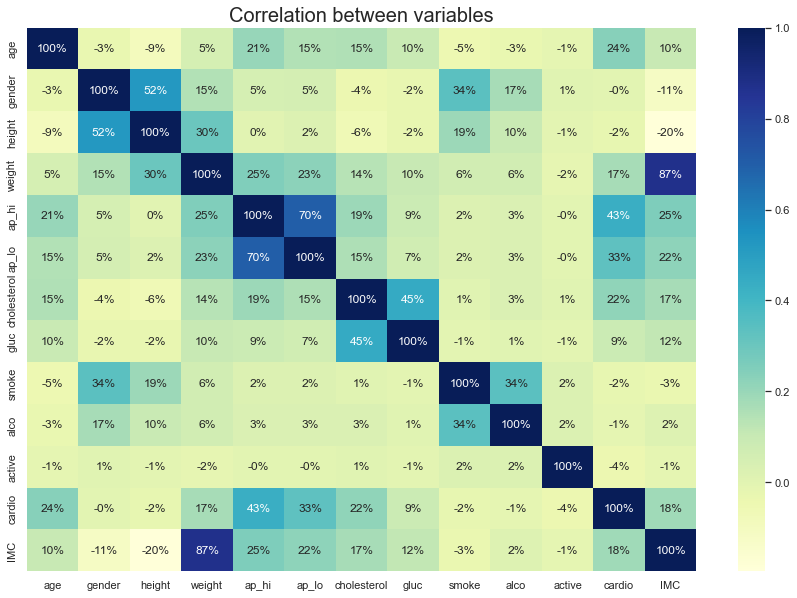

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Correlation between variables', fontsize = 20);

# Machine Learning

## Import Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Ignorar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65708 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65708 non-null  int32  
 1   gender       65708 non-null  int64  
 2   height       65708 non-null  int64  
 3   weight       65708 non-null  float64
 4   ap_hi        65708 non-null  int64  
 5   ap_lo        65708 non-null  int64  
 6   cholesterol  65708 non-null  int64  
 7   gluc         65708 non-null  int64  
 8   smoke        65708 non-null  int64  
 9   alco         65708 non-null  int64  
 10  active       65708 non-null  int64  
 11  cardio       65708 non-null  int64  
 12  IMC          65708 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 6.8 MB


In [31]:
# Select features
cols_to_use = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
              'active', 'IMC']
X = df[cols_to_use]

# Select target
y = df.cardio

# Separate data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Teste Data: {X_test.shape}, {y_test.shape}")

Train Data: (45995, 12), (45995,)
Teste Data: (19713, 12), (19713,)


In [32]:
# Defining Model
model = RandomForestClassifier(n_estimators = 100,
                              random_state = 0)

#Training model
model.fit(X_train, y_train)

#Predict test model
y_pred_train = model.predict(X_train)

#Predict test model
y_pred_test = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia dos dados de treino
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Acurácia dos dados de treino:", accuracy_train)

# Calcular a acurácia dos dados de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Acurácia dos dados de teste:", accuracy_test)

Acurácia dos dados de treino: 0.9811283835199478
Acurácia dos dados de teste: 0.7031400598589763


In [34]:
# Model performance:
print ('Accuracy: ', accuracy_score (y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
print (classification_report (y_test, y_pred))

**Cross-validation**

In [ ]:
# Setting values for folds
n_folds = 3

kfold = KFold(n_folds, shuffle=True, random_state=0)

result = cross_val_score(model, X, y, cv=kfold)

# Score
print('Acurácia Final: %.3f%%' % (result.mean() * 100))


**Confusion matrix:**

    A confusion matrix is an N dimensional square matrix, where N represents the total number of target classes or categories. The confusion matrix can be used to evaluate a classifier whenever the data set is unbalanced. Let's consider a binary classification problem, in other words, the number of target classes is 2. A typical confusion matrix with two target classes (say "Yes" and "No"):
    
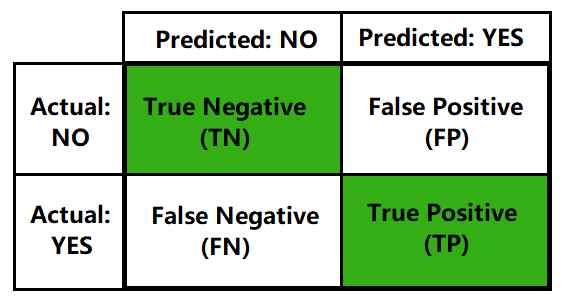
   
- True Positives (TP): Cases where the prediction 'YES' really belongs to the class 'YES.
- True Negatives (TN): Cases where the prediction 'NO' really belongs to class 'NO.
- False Positives (FP): Cases where the prediction 'YES' actually belongs to class 'NO. - Type 1 error
- False Negatives (FN): Cases where the prediction 'NO' actually belongs to class 'YES. - Type 2 error

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_test)
print(rf_cm)


# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.show()

**The accuracy of the classifier can be calculated from the confusion matrix using the following formula:**
    
    Accuracy = (TP + TN) / (TP + FP + TN + FN)
    Accuracy = (6627 + 7234) / (6627 + 2829 + 7234 + 3023)
    Accuracy = 0,703 ou 70.3%

In [ ]:
#Precision
from sklearn.metrics import precision_score


# Calculating the Train precision score of classifier
precision_train = precision_score(y_train, y_pred_train)
print("Precision dos dados de treino:", precision_train)

# Calculating the Test precision score of classifier
precision_test = precision_score(y_test, y_pred_test)
print("Precision dos dados de teste:", precision_test)

In [ ]:
#Sensitivy (Recall)
from sklearn.metrics import recall_score

# Calculating the Train recall score of classifier
recall_train = recall_score(y_train, y_pred_train)
print("Recall dos dados de treino:", recall_train)


# Calculating the Test recall score of classifier
recall_test = recall_score(y_test, y_pred_test)
print("Recall dos dados de teste:", recall_test)


**F1 Score:** It should be used when precision and recall are important to the case under study. It is the harmonic mean between them.

    It is defined between 0 and 1.
    F1 Score = 2 * Precision * Recall / Precision + Recall
- If both False Positives (FP) and False Negatives (FN) are important, then β = 1.
- If False Positive (FP) is important, then β lies between o and 1.
- If False Negative (FN) is important, then β > 1.

In [ ]:
from sklearn.metrics import f1_score

# Calculating Train F1 score of classifier
f1_train = f1_score(y_train, y_pred_train)
print("F1-score dos dados de treino:", f1_train)

# Calculating Test F1 score of classifier
f1_test = f1_score(y_test, y_pred_test)
print("F1-score dos dados de teste:", f1_test)

**AUC-ROC Curve:** 

     AUC-ROC curve is a performance metric that is used to measure the performance of the classification model at different threshold values. ROC is the receiver operating characteristic curve and AUC is the area under the curve. The higher the value of AUC (Area under the curve), the better our classifier is at predicting classes. AUC-ROC is mainly used in binary classification problems.

    The ROC curve is plotted between the true positive rate (TPR) and the false positive rate (FPR), i.e. TPR on the y-axis and FPR on the x-axis. AUC is the area under the ROC curve. 
 
**An excellent classifier has an AUC value close to 1, while a poor performing classifier has an AOC value close to 0. A classifier with an AOC score of 0.5 has no class separation capability.**

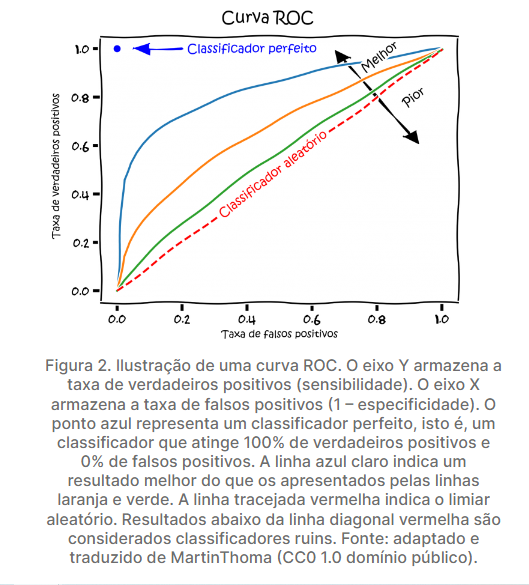

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Calculating and displaying the ROC curve for the Random Forest model
rf_probabilities = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probabilities)
roc_auc = auc(fpr_rf, tpr_rf)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")



plt.figure()
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()